# Analisando dados de vacinação contra a covid-19 com SQL e python
### Autor: Luiz Carlos

## Introdução  

" Vacinação contra a Covid: Mais de 55% dos brasileiros estão parcialmente imunizados e mais de 25% completaram o esquema vacinal " 
    É comum encontrarmos noticiários com a manchete mencionada acima, a qual indica o status da vacinação no país. Contudo, por trás desses números relativamente pequenos, se escondem números incrivelmente altos. Se pararmos para analisar sobre os números absolutos das doses aplicadas em todo o Brasil, veremos que refletem o esforço e trabalho de muitos profissionais. 
    Até o momento desta análise, o Brasil se encontra na faixa de 200 milhões de doses aplicadas. No entanto, é provável que esse número já esteja desatualizado, devido a alta quantidade de doses aplicadas diariamente.  
    
## Objetivo da análise
   Este material tem o propósito de aprendizagem, com o intuito de colocar em prática conceitos sobre a linguagem SQL, Python e análise de dados.
Nesta análise serão respondidas questões como:
  * Número total de doses de vacinas aplicadas no Brasil?
  * Número total de doses de vacinas aplicadas nos estados brasileiros?
  * Número total da 1º doses de vacinas aplicadas?
  * Número total de pessoas completamente vacinadas no Brasil?
  * Relação de pessoas completamente vacinadas no Brasil x população de outros países.
  * Relação entre covid-19 e Vacinação.
  
## Considerações

Gostaria de deixar claro que a manchete será ideal ou ótima, quando: "Vacinação contra a Covid: 100% dos brasileiros estão completamente imunizados e nenhuma morte por covid tem sido registrada até o momento".  

O objetivo desta análise não apresenta nenhum viés político. Os dados sobre a vacinação foram analisados somente como forma de aplicação de conceitos e para sanar uma curiosidade a respeito dos números absolutos por trás da porcentagem mencionada nas manchetes.   

Aproveito para deixar o meu agradecimento a todos os cientistas, instituições de pesquisa e profissionais da saúde que estiveram ou estão envolvidos de alguma forma com a covid-19. O trabalho de vocês é e está sendo essencial no combate à pandemia. 

  

In [2]:
# Importando as bibliotecas para análise dos dados com python e SQL.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import Error

# Padronizando alguns parâmetros.
pd.set_option('display.max_columns', None, 'display.min_rows', 50)
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 10)
sns.set()

## Criando uma conexão com o banco de dados:

In [3]:
# Criando conexão com o banco de dados SQLite3:
try:
    '''Criando uma conexão com o banco de dados e um cursor para executar as queries no BD. 
    Certifique-se de inserir corretamente o nome do banco de dados e o endereço do diretório do BD como
    parâmetro da função. Exemplo: .connect('endereço_diretório/nome_aquivo.db')'''
    connection = sqlite3.connect('covid.db')
    cursor = connection.cursor()
    cursor.execute('SELECT sqlite_version()')
    BD_version = cursor.fetchall()
    print(f"Conexão estabelecida com o BD SQLite, versão: {BD_version[0][0]},\nObjeto de conexão criado e armazenado em {connection}")
    
except Error as e:
    print(f"Erro '{e}': Verifique se o nome e endereço do banco de dados estão corretos")

Conexão estabelecida com o BD SQLite, versão: 3.36.0,
Objeto de conexão criado e armazenado em <sqlite3.Connection object at 0x000001CD8BA2FA80>


## Informações sobre as tabelas presentes no Banco de Dados

In [3]:
# Verificando as tabelas existentes no Banco de dados:
tabelas = pd.read_sql_query("SELECT NAME AS Tabelas_no_BD FROM sqlite_master WHERE type = 'table'", connection)

# Verificando o Tipo de objeto retornado pela query:
print(f'O tipo do objeto retornado pela query é do tipo: {type(tabelas)}')

# Imprimindo um dataframe com as tabelas existentes:
tabelas

O tipo do objeto retornado pela query é do tipo: <class 'pandas.core.frame.DataFrame'>


,Tabelas_no_BD
0,population_by_country_2020
1,covid_brasil
2,vacinacao_data_UF
3,vacinacao


In [4]:
# Pelo fato do objeto retornado pela query ser do tipo dataframe do pandas, pode-se fazer um interação sobre o objeto 
# e usar os valores para obtermos informações sobre as tabelas presentes no BD.
for idx, tab in tabelas.Tabelas_no_BD.iteritems():
    sql = f"PRAGMA TABLE_INFO({tab})"
    resultado = pd.read_sql_query(sql, connection)
    print("Informações sobre a tabela:", tab)
    display(resultado)
    print("-"*100)
    print("\n")

Informações sobre a tabela: population_by_country_2020


,cid,name,type,notnull,dflt_value,pk
0,0,Country,TEXT,0,None,0
1,1,Population_2020,INTEGER,0,None,0
2,2,Yearly_Change,TEXT,0,None,0
3,3,Net_Change,INTEGER,0,None,0
4,4,Density_P/Km²,INTEGER,0,None,0
5,5,Land_Area_Km²,INTEGER,0,None,0
6,6,Migrants_net,REAL,0,None,0
7,7,Fert_Rate,REAL,0,None,0
8,8,Med_Age,INTEGER,0,None,0
9,9,Urban_Pop_perc,TEXT,0,None,0


----------------------------------------------------------------------------------------------------


Informações sobre a tabela: covid_brasil


,cid,name,type,notnull,dflt_value,pk
0,0,regiao,TEXT,0,None,0
1,1,estado,TEXT,0,None,0
2,2,municipio,TEXT,0,None,0
3,3,coduf,INTEGER,0,None,0
4,4,codmun,TEXT,0,None,0
5,5,codRegiaoSaude,TEXT,0,None,0
6,6,nomeRegiaoSaude,TEXT,0,None,0
7,7,data,TEXT,0,None,0
8,8,semanaEpi,INTEGER,0,None,0
9,9,populacaoTCU2019,REAL,0,None,0


----------------------------------------------------------------------------------------------------


Informações sobre a tabela: vacinacao_data_UF


,cid,name,type,notnull,dflt_value,pk
0,0,UF,TEXT,0,None,0
1,1,data_vacinacao,TEXT,0,None,0
2,2,quantidade,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Informações sobre a tabela: vacinacao


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,Municipio,TEXT,0,None,0
2,2,Cod_IBGE,INTEGER,0,None,0
3,3,UF,TEXT,0,None,0
4,4,Regiao,TEXT,0,None,0
5,5,Fabricante,TEXT,0,None,0
6,6,Doses_Aplicadas,INTEGER,0,None,0
7,7,Dose_1,INTEGER,0,None,0
8,8,Dose_2,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




## Carregando os datasets:

### Dados de vacinação no Brasil

[Link para download do dataset](https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html)

In [5]:
# Realizando a leitura da tabela
df = pd.read_sql('SELECT * FROM vacinacao', connection)
df.head()

,id,Municipio,Cod_IBGE,UF,Regiao,Fabricante,Doses_Aplicadas,Dose_1,Dose_2
0,1,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3450,2633,817
1,2,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3068,1661,1407
2,3,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1125,1125,0
3,4,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0
4,5,Abadia Dos Dourados,310010,MG,Sudeste,FIOCRUZ/ASTRAZENECA,3624,2711,913


In [6]:
# Tratando os dados. Ao final da tabela, há várias linhas preenchidas com - .
# Tais valores não representam dados válidos e irão deixar a visualização dos dados inadequadas. Por isso, irei removê-los.
filtro = df[df['Fabricante'] == '-'].index
df.drop(filtro, inplace=True)
# Verificando as modificações da tabela "vacinação" filtrado.
df.tail()

,id,Municipio,Cod_IBGE,UF,Regiao,Fabricante,Doses_Aplicadas,Dose_1,Dose_2
21802,21803,Zé Doca,211400,MA,Nordeste,JANSSEN,357,0,0
21803,21804,Zortéa,421985,SC,Sul,FIOCRUZ/ASTRAZENECA,1338,928,410
21804,21805,Zortéa,421985,SC,Sul,BUTANTAN/SINOVAC,1160,666,494
21805,21806,Zortéa,421985,SC,Sul,PFIZER/BIONTECH,778,778,0
21806,21807,Zortéa,421985,SC,Sul,JANSSEN,110,0,0


In [7]:
# Criando uma nova coluna com os valores de vacinação completa. Tal coluna representa o número de pessoas que tomaram as duas doses.
# Para isso, irei usar uma função do numpy. Segue abaixo uma descrição:
# np.where(1º param é inserir a condição a ser analisada, '''2º param é a'''função ou valor''' caso a condição seja verdadeira , '''3º param é a'''função ou valor''' caso a condição seja falsa)
df['vacinacao_completa'] = np.where(df['Fabricante']=='JANSSEN', df.Doses_Aplicadas.values, df.Dose_2)
df.head()

,id,Municipio,Cod_IBGE,UF,Regiao,Fabricante,Doses_Aplicadas,Dose_1,Dose_2,vacinacao_completa
0,1,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3450,2633,817,817
1,2,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3068,1661,1407,1407
2,3,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1125,1125,0,0
3,4,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0,65
4,5,Abadia Dos Dourados,310010,MG,Sudeste,FIOCRUZ/ASTRAZENECA,3624,2711,913,913


### Carregando os dados de vacinação diária nos estados brasileiros:

[Link para download do dataset](https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html)

In [8]:
# Este dataset contém o número de vacinações diárias com datas. Estou utilizando este dataset pois o df resumido fornecido pelo MS 
# não possui datas. Irei precisar das mesmas para calcular valores totais e média diária das vacinas aplicadas.
df2 = pd.read_sql('SELECT * FROM vacinacao_data_UF', connection)
df2.head()

,UF,data_vacinacao,quantidade
0,AC,18/01/2021,1
1,AC,19/01/2021,45
2,AC,20/01/2021,1019
3,AC,21/01/2021,1611
4,AC,22/01/2021,1106


In [9]:
# filtrando novamente os valores inválidos.
filtro = df2[df2["data_vacinacao"] == '-'].index
df2.drop(filtro, inplace=True)
df2.head()

,UF,data_vacinacao,quantidade
0,AC,18/01/2021,1
1,AC,19/01/2021,45
2,AC,20/01/2021,1019
3,AC,21/01/2021,1611
4,AC,22/01/2021,1106


In [10]:
# Criando uma nova coluna no formato datetime, para que este possa ser transformada em index.
# Com isso eu poderei fazer um resample do df por dia, mês ou algum período de tempo.
df2['data'] = pd.to_datetime(df2['data_vacinacao'], format='%d/%m/%Y')
df2.set_index('data', inplace=True)
df2.head()

,UF,data_vacinacao,quantidade
data,,,
2021-01-18,AC,18/01/2021,1
2021-01-19,AC,19/01/2021,45
2021-01-20,AC,20/01/2021,1019
2021-01-21,AC,21/01/2021,1611
2021-01-22,AC,22/01/2021,1106


### Carregando os números referentes a população por países em 2020

[Link para download do dataset](https://www.kaggle.com/tanuprabhu/population-by-country-2020)

In [11]:
# Este link dhttps://www.kaggle.com/tanuprabhu/population-by-country-2020f contém a população dos países, dos quais usarei para comparação.
# Como parâmetro da query, passo uma lista das colunas de que preciso. 
cols = 'Country, Population_2020, Land_Area_Km², Med_Age, World_Share'
df_pop = pd.read_sql(f'SELECT {cols} FROM population_by_country_2020', connection)
print(f'Número de países presentes no datset é de: {len(df_pop)}')

Número de países presentes no datset é de: 235


In [12]:
df_pop.head()

,Country,Population_2020,Land_Area_Km²,Med_Age,World_Share
0,China,1440297825,9388211,38,18.47 %
1,India,1382345085,2973190,28,17.70 %
2,United States,331341050,9147420,38,4.25 %
3,Indonesia,274021604,1811570,30,3.51 %
4,Pakistan,221612785,770880,23,2.83 %


In [13]:
# Extraindo o tamanho da popução brasileira do df acima ou através de uma query direta do Banco de dados.
# pop_Br = df_pop[df_pop['Country'] == 'Brazil']['Population_2020'].values[0]
sql = "SELECT Population_2020 FROM population_by_country_2020 WHERE Country='Brazil'"
cursor.execute(sql)
res = cursor.fetchall()
pop_Br=res[0][0]

print(f'O tamanho da população brasileira em 2020 é de: {pop_Br}')

O tamanho da população brasileira em 2020 é de: 212821986


In [14]:
# Filtrando por países com uma população entre 15M e 50M de habitantes.
world50M = df_pop[(df_pop['Population_2020'] <= 50000000) & (df_pop['Population_2020'] > 15000000) ]
world50M2 = df_pop[(df_pop['Population_2020'] <= 50000000)]

# Verificando o número de países que possuem uma população entre 15M e 50M.

print(f'Número de países com uma população entre 15 milhões e 50 milhões é de: {len(world50M)}')
print(f'Número de países com uma população menor que 50 milhões é de: {len(world50M2)}')


Número de países com uma população entre 15 milhoes e 50 milhões é de: 44
Número de países com uma população menor que 50 milhões é de: 206


In [15]:
world50M.head()

,Country,Population_2020,Land_Area_Km²,Med_Age,World_Share
29,Spain,46757980,498800,45,0.60 %
30,Uganda,45974931,199810,17,0.59 %
31,Argentina,45267449,2736690,32,0.58 %
32,Algeria,43984569,2381740,29,0.56 %
33,Sudan,44019263,1765048,20,0.56 %


In [16]:
# Filtrando por países com uma população menor que 200.000 habitantes.
world5M = df_pop[(df_pop['Population_2020'] <= 5000000)]

# Verificando o número de países que possuem uma população entre 5M e 20M.
print(f'Número de países com uma população até 5 milhões é de: {len(world5M)}')

Número de países com uma população até 5 milhões é de: 112


In [17]:
world5M.head()

,Country,Population_2020,Land_Area_Km²,Med_Age,World_Share
123,Ireland,4947267,68890,38,0.06 %
124,Central African Republic,4843954,622980,18,0.06 %
125,New Zealand,4829021,263310,38,0.06 %
126,Mauritania,4669775,1030700,20,0.06 %
127,Panama,4326296,74340,30,0.06 %


### Carregando os dados da covid no Brasil
[link do dataset](https://covid.saude.gov.br/)

In [18]:
# Este dataset possui os casos de covid no Brasil desde o início da pandemia.
cols = 'regiao, data, casosAcumulado, casosNovos, obitosAcumulado, obitosNovos'
df_covid = pd.read_sql(f'SELECT {cols} FROM covid_brasil', connection)
df_covid.head()

,regiao,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Brasil,2020-02-25,0.00,0,0,0
1,Brasil,2020-02-26,1.00,1,0,0
2,Brasil,2020-02-27,1.00,0,0,0
3,Brasil,2020-02-28,1.00,0,0,0
4,Brasil,2020-02-29,2.00,1,0,0


In [19]:
# Novamente, estou criando uma nova coluna no formato datetime para que esta possa ser transformada em index.
# Com isso, eu poderei fazer um resample do df por mês.
df_covid['data'] = pd.to_datetime(df_covid['data'], format='%Y-%m-%d')
df_covid.set_index('data', inplace=True)
df_covid.head()

,regiao,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
data,,,,,
2020-02-25,Brasil,0.00,0,0,0
2020-02-26,Brasil,1.00,1,0,0
2020-02-27,Brasil,1.00,0,0,0
2020-02-28,Brasil,1.00,0,0,0
2020-02-29,Brasil,2.00,1,0,0


# Parte - 1 Respondendo pergundas sobre o andamento da vacinação contra a codid-19 no Brasil

### Número total de vacinas aplicadas?

In [20]:
total_vacinas_apli = df.Doses_Aplicadas.sum()
print(f'Total de vacinas aplicadas é:  {total_vacinas_apli}')

Tatal de vacinas aplicadas é:  173486717


### Número de pessoas vacinadas com a primeira dose?

In [21]:
total_dose1 = df.Dose_1.sum()
print(f'Total de pessoas vacinadas com a primeira dose é: {total_dose1}')

Total de pessoas vacinada com a primeira dose é: 120064684


### Porcentagem da população vacinada com a primeira dose?

In [22]:
dose_1 = (df.Dose_1.sum() * 100) / pop_Br
print('Porcentagem da população vacinada com a primeira dose é de {:.2f}%'.format(dose_1))

Porcentagem da população vacinada com a primeira dose é de 56.42%


### Número total de pessoas totalmente vacinadas?

In [23]:
total_vacinado =  df['vacinacao_completa'].sum()
print(f'Tatal de pessoas completamente vacinadas {total_vacinado}')

Tatal de pessoas completamente vacinadas 53582309


### Porcentagem da população completamente vacinada?

In [24]:
complet_vacinado = (df.vacinacao_completa.sum() * 100) / pop_Br
print('Porcentagem da população completamente vacinada {:.2f}%'.format(complet_vacinado))

Porcentagem da população completamente vacinada 25.18%


## Criando um novo df com a soma das doses aplicadas, agrupados por fabricante

A criação de um dataframe agrupado pela quantidade de doses aplicadas por cada fabricante nos permitirá saber qual é o imunizante predominante na população brasileira.  
Como esperado, o imunizante com a maior distribuição no país é a CoronaVac, produzida pelo Butantan. Quase 60 milhões de CoronaVac foram aplicadas e mais de 25 milhões de pessoas foram completamente imunizadas, ou seja, tomaram as duas doses da vacina.

In [25]:
# Agrupando o total de vacinas aplicadas por fabricante
cols = ['Doses_Aplicadas', 'vacinacao_completa']
df_vac = df.groupby(df['Fabricante'], as_index=False)[cols].sum()
df_vac

,Fabricante,Doses_Aplicadas,vacinacao_completa
0,BUTANTAN/SINOVAC,59871058,25438723
1,FIOCRUZ/ASTRAZENECA,79239644,21910952
2,JANSSEN,4391604,4391604
3,PFIZER/BIONTECH,29984411,1841030


In [26]:
# Criando uma coluna com a porcentagen da população vacinada por tipo de vacina/fabricante
df_vac['por cento_fabricante'] = (df_vac.vacinacao_completa * 100) / (df_vac.vacinacao_completa.sum())
df_vac.head()

,Fabricante,Doses_Aplicadas,vacinacao_completa,porcento_fabricante
0,BUTANTAN/SINOVAC,59871058,25438723,47.48
1,FIOCRUZ/ASTRAZENECA,79239644,21910952,40.89
2,JANSSEN,4391604,4391604,8.20
3,PFIZER/BIONTECH,29984411,1841030,3.44


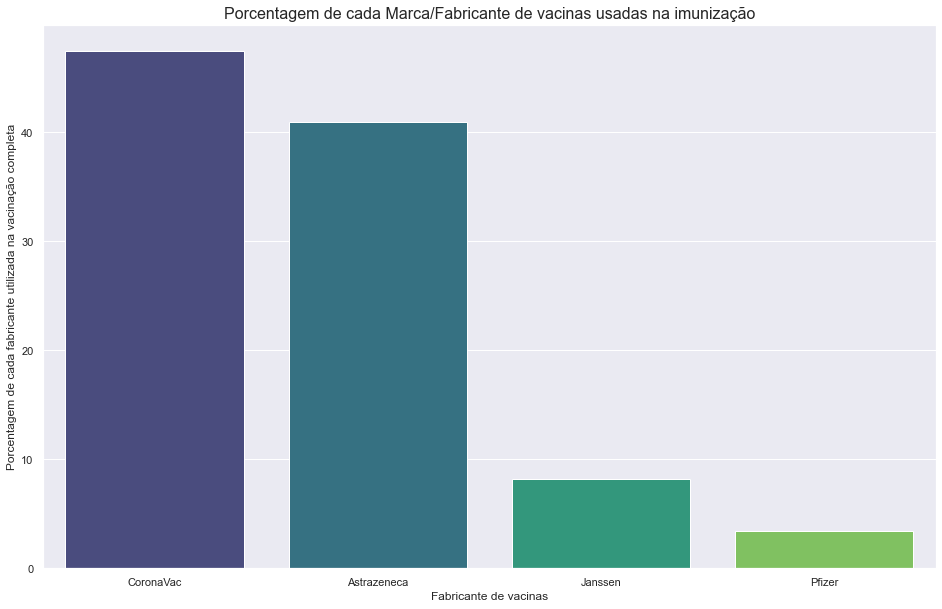

In [27]:
# Plotando os valores em porcentagem das vacinas aplicadas no país:
sns.barplot(y= 'por cento_fabricante', x='Fabricante', data=df_vac, palette='viridis')
plt.title("Porcentagem de cada Marca/Fabricante de vacinas usadas na imunização",fontdict= {'size':16})
plt.xlabel('Fabricante de vacinas')
plt.ylabel('Porcentagem de cada fabricante utilizada na vacinação completa')

plt.xticks([0, 1, 2, 3], ['CoronaVac', 'Astrazeneca', 'Janssen','Pfizer'])
plt.show()

Como observado acima, as quase 60 milhões de doses aplicadas da CoronaVac representam aproximadamente 50% dos imunizantes responsáveis pela completa imunização da população.

# Parte 2 - Comparando os números por trás das porcentagens de vacinação de covid-19 no Brasil

Olhar apenas para os valores em porcentagem da população vacinada, pode não parecer um valor muito alto. Mas quando olhamos para os números absolutos das quantidades de doses que foram e vêm sendo aplicadas, é que temos uma real noção do trabalho que vem sendo realizado pelos profissionais da saúde.
  * O número total de doses de vacinas aplicadas no Brasil já ultrapassaram os seus 180 MILHÕES.
  * O número total de pessoas vacinadas já ultrapassou os 50 milhões também.
  * E o número das doses aplicadas de vacinas que são produzidas ou que têm participação do Brasil, como a CoronaVac e a Astrazeneca já ultrapassaram mais de 140 MILHÕES de doses aplicadas.
   

### Valores totais de vacinas aplicadas no Brasil por fabricante:

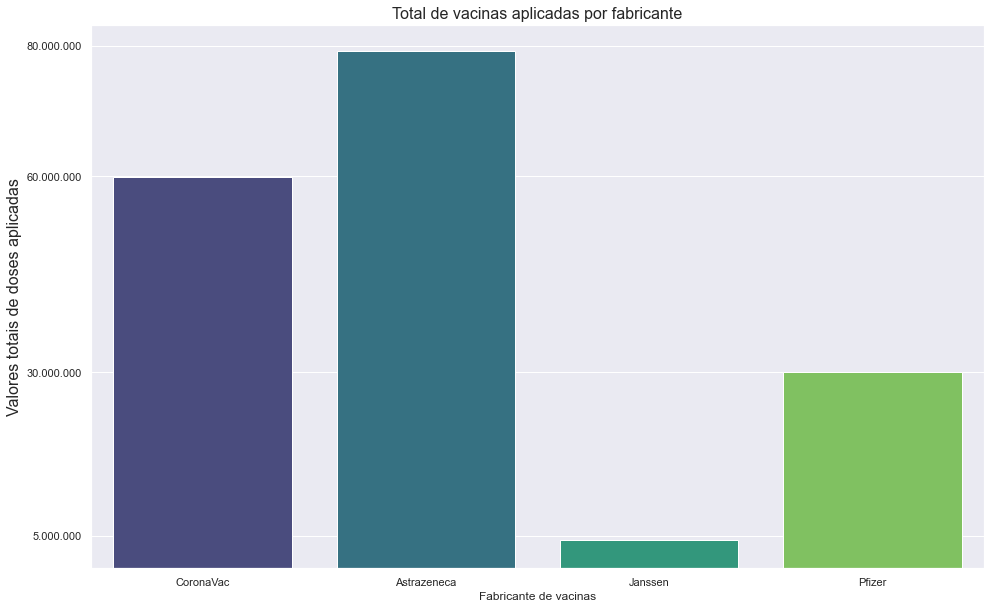

In [28]:
# Valores totais de vacinas aplicadas no Brasil por fabricante:
sns.barplot(y= 'Doses_Aplicadas', x='Fabricante', data=df_vac, palette='viridis')
plt.title("Total de vacinas aplicadas por fabricante",fontdict= {'size':16})
plt.xticks([0, 1, 2, 3], ['CoronaVac', 'Astrazeneca', 'Janssen','Pfizer'])
plt.ylabel('Valores totais de doses aplicadas', fontsize=16)
plt.xlabel('Fabricante de vacinas')
plt.yticks([5000000, 30000000, 60000000, 80000000], ['5.000.000', '30.000.000', '60.000.000','80.000.000'])
plt.show()

### Número total de vacinas aplicadas nos estados brasileiros

Neste gráfico o intuito é mostrar os valores absolutos das doses aplicadas nos estados brasileiros. É importante salientar que a discrepância dos valores do gráfico não refletem uma real situação do andamento da vacinação nos estados brasileiros, já que a distribuição das vacinas é feita de forma proporcional ao tamanho da população.  

Por isso, o estado de São Paulo possui um valor de doses aplicadas tão elevado, já que esse também possui a maior população do País. Seguido por Minas Gerais e Rio de Janeiro, 2º e 3º maior população respectivamente.

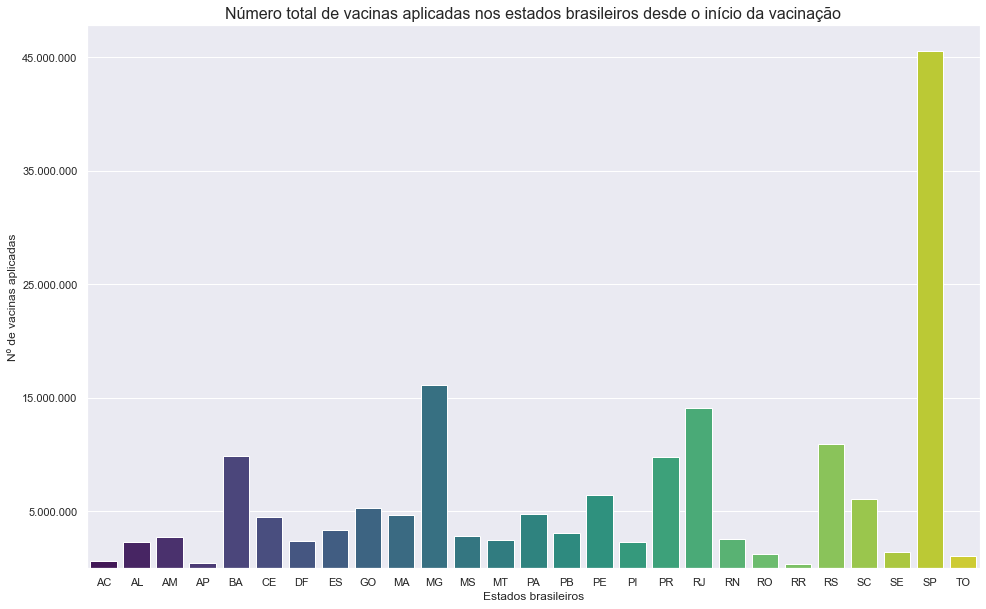

In [29]:
# Agrupando os dados por estados:
total_vacina = df2.groupby(df2['UF'], as_index=False)['quantidade'].sum()
sns.barplot(y= 'quantidade', x='UF', data=total_vacina, palette='viridis')
plt.title('Número total de vacinas aplicadas nos estados brasileiros desde o início da vacinação', fontsize=16)
plt.xlabel('Estados brasileiros')
plt.ylabel('Nº de vacinas aplicadas')
plt.yticks([5000000, 15000000, 25000000, 35000000, 45000000], ['5.000.000','15.000.000', '25.000.000', '35.000.000','45.000.000'])
plt.show()

### Média diária das doses de vacinas aplicadas nos estados brasileiros.
Esta média foi realizada levando em consideração o início da vacinação em 17 de janeiro de 2021

In [30]:
# Média diária das doses de vacina aplicadas no Brasil
med_doses_apli = df2.quantidade.mean()
print('A média diária de doses aplicadas nos estados brasileiros é de: {:.0f} mil doses'.format(med_doses_apli))

A média diária de doses aplicadas nos estados brasileiros é de: 28777 mil doses


28777.499228262735


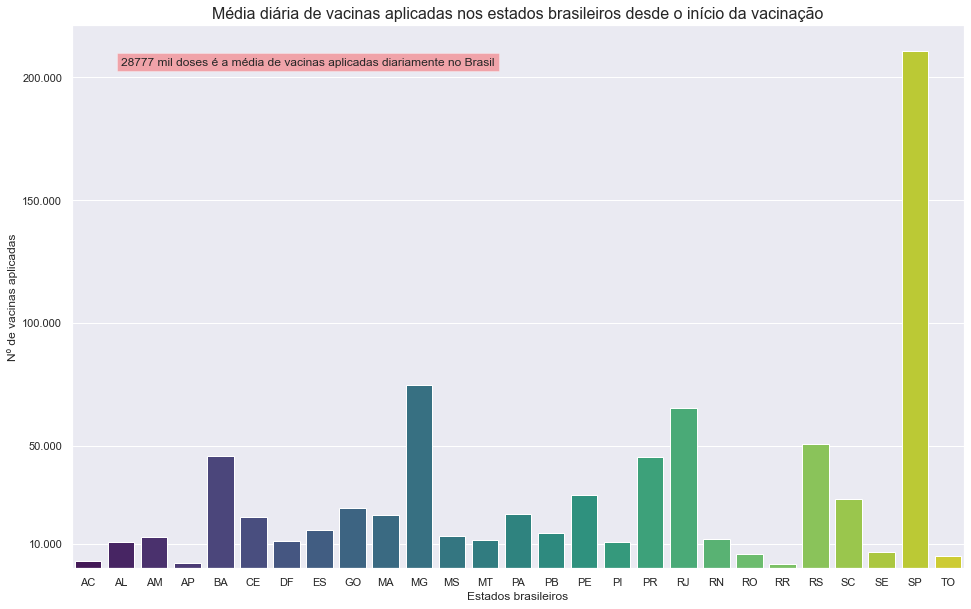

In [31]:
# Média diária do valor absoluto de vacinas aplicadas diariamente nos estados brasileiros
med_dia = df2.groupby(df2['UF'], as_index=False)['quantidade'].mean()
sns.barplot(y= 'quantidade', x='UF', data=med_dia, palette='viridis')
plt.title('Média diária de vacinas aplicadas nos estados brasileiros desde o início da vacinação', fontsize=16)
plt.xlabel('Estados brasileiros')
plt.ylabel('Nº de vacinas aplicadas')
print(med_doses_apli)
plt.text(1, 205000, '{:.0f} mil doses é a média de vacinas aplicadas diariamente no Brasil'.format(med_doses_apli), fontsize=12, bbox=dict(facecolor='red', alpha=0.3))
plt.yticks([10000, 50000, 100000, 150000, 200000], ['10.000','50.000', '100.000', '150.000','200.000'])
plt.show()

### Para servir de comparação, abaixo encontra-se a população de alguns países com população nacional entre 15 milhões e 50 milhoes.
   * Atualmente, o números que temos de pessoas completamente vacinadas já supera a população de mais de 200 países, considerando uma população de até 50 milhões.
   * Ou ainda a vacinaçãoa completa de alguns países juntos.

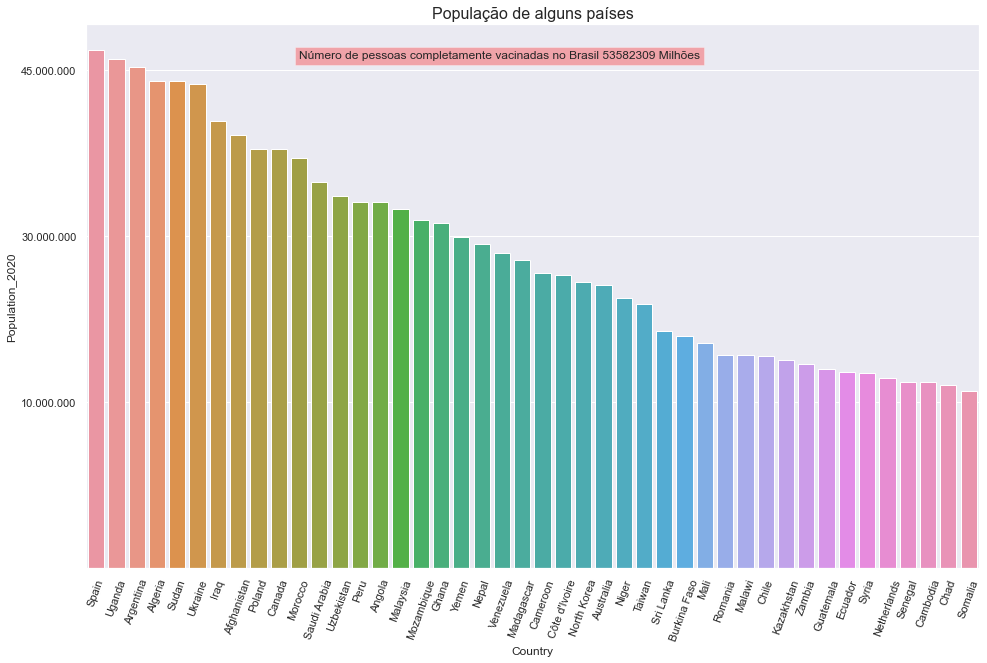

In [32]:
# Gráfico com países com população entre 15.000.000 e 50.000.000
sns.barplot(data=world50M, x='Country', y= 'Population_2020')
plt.xticks(rotation=70)
plt.yticks([15000000, 30000000, 45000000], ['10.000.000', '30.000.000','45.000.000'])
plt.title('População de alguns países', fontsize=16)
plt.text(10, 46000000, f'Número de pessoas completamente vacinadas no Brasil {total_vacinado} Milhões', fontsize=12, bbox=dict(facecolor='red', alpha=0.3))
plt.show()

### Abaixo se encontra o gráfico com países de população menor que 5 milhões de habitantes

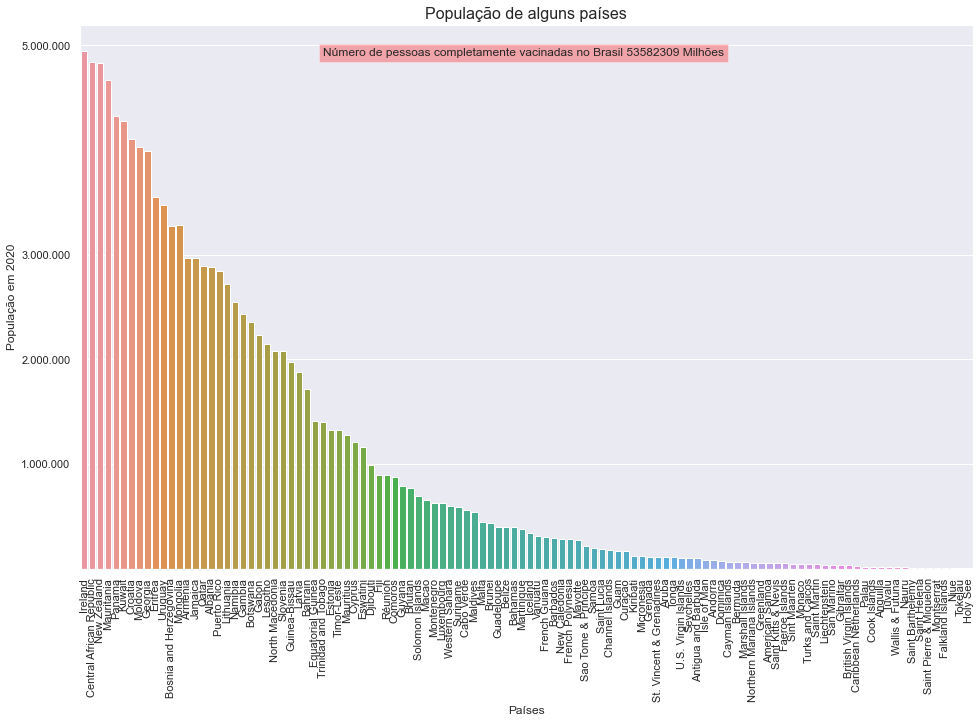

In [33]:
# Gráfico com países com população até 5.000.000
sns.barplot(data=world5M, x='Country', y= 'Population_2020')
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.yticks([1000000, 2000000, 3000000, 5000000], ['1.000.000', '2.000.000','3.000.000', '5.000.000'])
plt.ylabel('População em 2020')
plt.title('População de alguns países', fontsize=16)
plt.text(30, 4900000, f'Número de pessoas completamente vacinadas no Brasil {total_vacinado} Milhões', fontsize=12, bbox=dict(facecolor='red', alpha=0.3))
plt.show()

O número de pessoas completamente imunizadas no Brasil é de 50 milhões. Esse número representa mais do que suficiente para vacinar a população inteira de mais 10 países juntos. E representa ainda mais, se compararmos com países com população abaixo de 3 milhões.

# Parte 3 - Comparando os casos de Covid-19 e a vacinação no Brasil.

In [34]:
# Criando um df com os valores totais da vacinaçao mensal do país
df2_M = df2.resample('M').sum()
df2_M

,quantidade
data,
2021-01-31,3071787
2021-02-28,6693686
2021-03-31,16928526
2021-04-30,23417378
2021-05-31,21099644
2021-06-30,30427963
2021-07-31,38881875
2021-08-31,27280739


In [35]:
# Realizando um loop sobre o df2_M para criar uma nova coluna com os valores acumulados das doses de vacinas aplicadas ao longo 
# do período de vacinação.
col= []
a = 0
for idx, val in df2_M.quantidade.iteritems():
    a+=val
    col.append(a)

# Criando a nova coluna
df2_M['Doses_aplicadas'] = col

# Conferindo o df
df2_M

,quantidade,Doses_aplicadas
data,,
2021-01-31,3071787,3071787
2021-02-28,6693686,9765473
2021-03-31,16928526,26693999
2021-04-30,23417378,50111377
2021-05-31,21099644,71211021
2021-06-30,30427963,101638984
2021-07-31,38881875,140520859
2021-08-31,27280739,167801598


In [36]:
# Criando um df com os dados de covid reagrupados por mês.
df_covid_M = df_covid.resample('M').max()
df_covid_M.head()

,regiao,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
data,,,,,
2020-02-29,Brasil,2.00,1,0,0
2020-03-31,Brasil,"5,717.00",1138,201,42
2020-04-30,Brasil,"85,380.00",7218,5901,474
2020-05-31,Brasil,"514,200.00",33274,29314,1188
2020-06-30,Brasil,"1,402,041.00",54771,59594,1473


### Relação entre a vacinação e os casos de covid-19

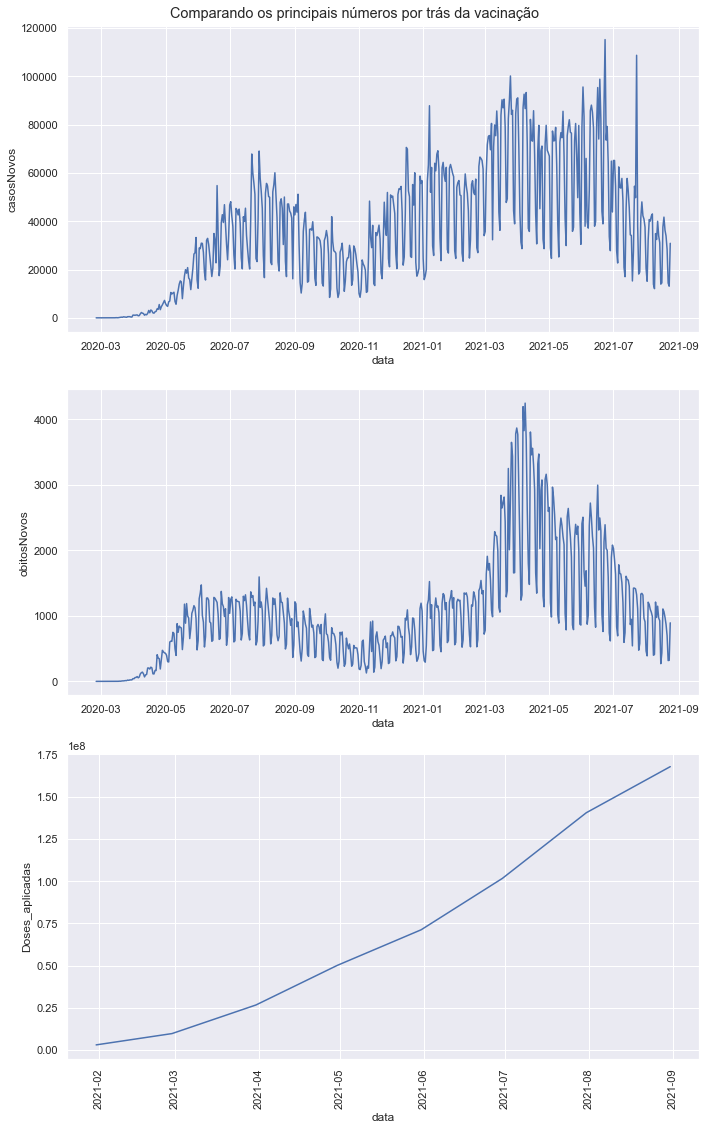

In [37]:
# Comparando covid e casos de vacinação por dia
fig , axes = plt.subplots(3, 1, figsize = (10, 16))

plt.suptitle('Comparando os principais números por trás da vacinação')
sns.lineplot(data=df_covid, x=df_covid.index, y=df_covid.CasosNovos, ax=axes[0])
sns.lineplot(data=df_covid, x=df_covid.index, y=df_covid.ObitosNovos, ax=axes[1])
sns.lineplot(data=df2_M, x=df2_M.index, y=df2_M.Doses_aplicadas, ax=axes[2])


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Os resultados acima mostram uma relação de redução dos números totais de casos e óbitos por covid-19 com a progressão da vacinação.  

Os números de mortes por covid-19 começam a cair já em maio de 2021, quando atingimos o primeiro pico de vacinação, que representa aproximadamente 50 milhões de doses aplicadas.  

Já os números de casos começam a diminuir a partir de julho, quando o número de doses aplicadas foram por volta de 100 milhões. E até o mês desta análise, agosto, os números já superam os 170 milhões de doses aplicadas.  

Vale apena ressaltar que apesar da diminuição dos casos de covid com a vacinação, ainda temos muito do que nos preocupar. Já temos novas variantes do vírus circulante, e não temos total certeza de como esses números irão se comportar daqui para frente. Por isso, as medidas de distanciamente e prevenções ainda são recomendadas pelas autoridades de saúde.



# Atualizando as tabelas no banco de dados SQLite

In [38]:
# Criando uma nova coluna na tabela vacinacao_covid19 no banco de dados covid19  
cursor.execute('ALTER TABLE vacinacao ADD COLUMN vacinacao_completa INT')  
connection.commit()  

In [39]:
# Limpando os dados não conformes incorretamente:
cursor.execute("DELETE FROM vacinacao WHERE Fabricante = '-' ")
connection.commit()

In [40]:
# Criando uma lista de valores a serem inseridos na tabela vacinação no MySQL  
values = [i for i in df.vacinacao_completa.to_list()]
print(type(values))  
print(len(values)) 
#print(values)  

<class 'list'>
21793


In [41]:
# Atualizando dados da coluna "Vacinacao_completa" na tabela vacinação:
row = 0
for i in range(0, len(values)):
    row +=1
    val = values[i]
    sql = f"UPDATE vacinacao SET vacinacao_completa = {val} WHERE id = {row}"
    cursor.execute(sql)
    connection.commit()
print('Dados atualizados com sucesso!')

Dados atualizados com sucesso!


In [42]:
#### Verificando se as alterações foram inseridas na tabela vacinação.  
df = pd.read_sql_query("SELECT * FROM vacinacao", connection)  
df.head()  

,id,Municipio,Cod_IBGE,UF,Regiao,Fabricante,Doses_Aplicadas,Dose_1,Dose_2,vacinacao_completa
0,1,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3450,2633,817,817.00
1,2,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3068,1661,1407,"1,407.00"
2,3,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1125,1125,0,0.00
3,4,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0,65.00
4,5,Abadia Dos Dourados,310010,MG,Sudeste,FIOCRUZ/ASTRAZENECA,3624,2711,913,913.00


## Encerrando a cenexão com o Banco de dados:

In [43]:
# Encerrando a conexão com o servidor:
''' Deixar conexões abertas sem utilização pode levar a erros inesperados e problemas de desempenho, 
por isso fecha-las é uma boa prática.'''
cursor.close()
connection.close()
print("\n************************* Conexão encerrada com o servidor MySQL *************************")


************************* Conexão encerrada com o servidor MySQL *************************


## Referências:  
https://realpython.com/python-mysql/  
https://www.w3schools.com/python/python_mysql_getstarted.asp  

#### Dados baixados dia 19/08/2021
https://covid.saude.gov.br/  
https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html